In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [2]:
# aesthetic definitions for the plots
font = {'size'   : 22, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
# Varying parameter (others fixed to default)
var_min = 1.e-3
var_max = 0.1
var_num = 5
var_figname = 'omega_b'

# Fixed settings
common_settings = {'output':'mPk',
                   'h':0.6766,
                   'YHe':0.25,
                   'P_k_max_1/Mpc':3.0}  

# Loop over varying parameter values

M = {}

for i in range(var_num):
    
    omega_b = var_min + (var_max-var_min)*i/(var_num-1.)
    
    # If we impose omega_cdm to its default value, CLASS adjusts omega_lambda
    #omega_cdm = 0.11933
    
    # If we want to keep the matter content of the universe fixed, we need the following
    omega_cdm = 0.11933-omega_b
    
    # call CLASS
    M[i] = Class()
    M[i].set(common_settings)
    M[i].set({'omega_b':omega_b})
    M[i].set({'omega_cdm':omega_cdm})
    M[i].compute()
    
    # Check the matter and dark energy content
    print(M[i].Omega_m(),M[i].h(),M[i].Omega_Lambda())

0.2606667599268097 0.6766 0.7392418503156362
0.2606667599268097 0.6766 0.7392418503156362
0.2606667599268097 0.6766 0.7392418503156362
0.2606667599268097 0.6766 0.7392418503156362
0.2606667599268097 0.6766 0.7392418503156362


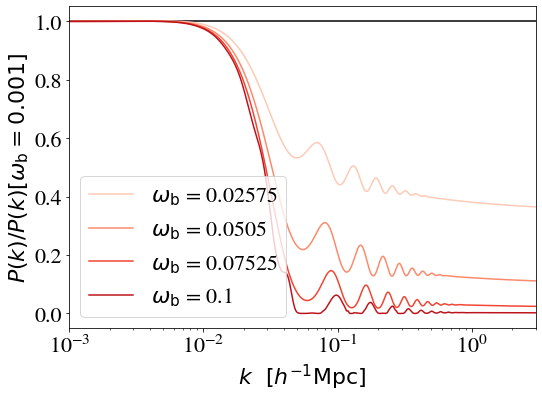

In [4]:
# Extract spectra and plot them

# Create figures
fig_Pk, ax_Pk = plt.subplots()

# Create an array of k values (in h/Mpc)
kvec = np.logspace(-4,np.log10(3),1000) 
twopi = 2.*math.pi

# Loop over varying parameter values
pkM = {}
legarray = []

for i in range(var_num):
    
    # Deal with varying parameters (for the legend)
    omega_b = var_min + (var_max-var_min)*i/(var_num-1.)
    
    # Deal with colors and legends
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        var_color = plt.cm.Reds(0.8*i/(var_num-1))

    # Store P(k) for common k values
    pkM[i] = []
    
    # The function .pk(k,z) wants k in 1/Mpc so we must convert kvec for each case with the right h 
    khvec = kvec*M[i].h() # This is k in 1/Mpc
    
    for kh in khvec:
        pkM[i].append(M[i].pk(kh,0.)*M[i].h()**3) 
    
    # Plot P(k)
    if i == 0:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-')
    else:
        ax_Pk.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                       color=var_color,#alpha=var_alpha,
                       linestyle='-',
                       label= r'$\omega_\mathrm{b}$ = %g' % omega_b)
        
ax_Pk.set_xlim([1.e-3,3.])
#ax_Pk.set_ylim([0.98,1.20])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h^{-1}\mathrm{Mpc}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)[\omega_\mathrm{b}=0.001]$')
ax_Pk.legend(loc='lower left')
fig_Pk.tight_layout()
fig_Pk.savefig('ratio-%s-Pk.pdf' % var_figname)        